<a href="https://colab.research.google.com/github/armandossrecife/piloto/blob/main/classes_criticas_cassandra_issues_bugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# classes_criticas_cassandra_issues_bugs


## Análise de correlação entre as classes críticas issues e bugfix

In [6]:
import pandas as pd
import seaborn as sns

data_a = {
    'file': [
        'StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java',
        'CompactionManager.java', 'StorageProxy.java', 'Config.java',
        'MessagingService.java', 'SSTableReader.java', 'NodeProbe.java',
        'SelectStatement.java', 'CassandraDaemon.java', 'SinglePartitionReadCommand.java'
    ],
    'appears_in_bugs': [
        160.0, 139.0, 90.0, 72.0, 71.0, 58.0, 50.0, 47.0, 39.0, 39.0, 28.0, 5.0
    ],
    'AMLOC': [
        3537, 1966, 2092, 1279, 1667, 553, 574, 767, 513, 1174, 1001, 994
    ],
    'FOC': [
        144, 89, 87, 74, 53, 52, 36, 53, 37, 44, 51, 38
    ],
    'CC': [
        838, 373, 471, 265, 377, 12, 165, 324, 255, 177, 117, 157
    ],
    'composition': [
        426816864, 65265302, 85723884, 25081190, 33308327, 345072, 3409560,
        13170924, 4840155, 9143112, 5972967, 5930204
    ]
}

data_b = {
    'file': [
        'StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java',
        'StorageProxy.java', 'CompactionManager.java', 'Config.java',
        'SSTableReader.java', 'MessagingService.java', 'NodeProbe.java',
        'SelectStatement.java', 'CassandraDaemon.java', 'SinglePartitionReadCommand.java'
    ],
    'appears_in_issues': [
        967.0, 832.0, 659.0, 463.0, 406.0, 379.0, 352.0, 288.0, 287.0, 245.0, 235.0, 83.0
    ],
    'AMLOC': [
        3537, 1966, 2092, 1667, 1279, 553, 767, 574, 513, 1174, 1001, 994
    ],
    'FOC': [
        144, 89, 87, 53, 74, 52, 53, 36, 37, 44, 51, 38
    ],
    'CC': [
        838, 373, 471, 377, 265, 12, 324, 165, 255, 177, 117, 157
    ],
    'composition': [
        426816864, 65265302, 85723884, 33308327, 25081190, 345072, 13170924,
        3409560, 4840155, 9143112, 5972967, 5930204
    ]
}

df_bugs = pd.DataFrame(data_a)
df_issues = pd.DataFrame(data_b)

In [9]:
df_issues

,file,appears_in_issues,AMLOC,FOC,CC,composition
0,StorageService.java,967.0,3537,144,838,426816864
1,ColumnFamilyStore.java,832.0,1966,89,373,65265302
2,DatabaseDescriptor.java,659.0,2092,87,471,85723884
3,StorageProxy.java,463.0,1667,53,377,33308327
4,CompactionManager.java,406.0,1279,74,265,25081190
5,Config.java,379.0,553,52,12,345072
6,SSTableReader.java,352.0,767,53,324,13170924
7,MessagingService.java,288.0,574,36,165,3409560
8,NodeProbe.java,287.0,513,37,255,4840155
9,SelectStatement.java,245.0,1174,44,177,9143112


<Axes: >

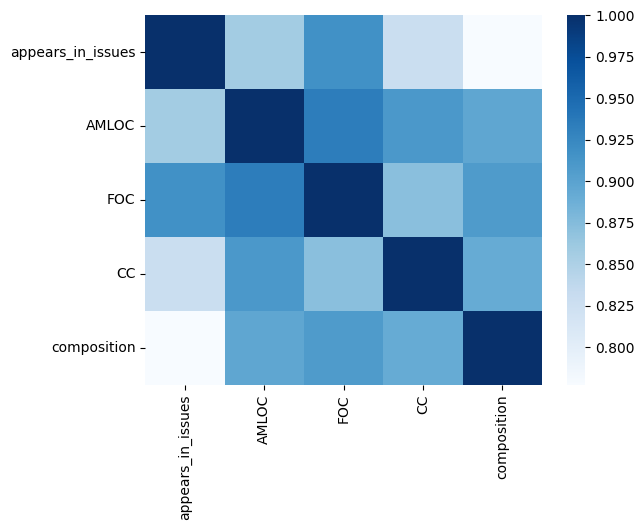

In [10]:
# calculate the correlation matrix on the numeric columns
corr = df_issues.select_dtypes('number').corr()
sns.heatmap(corr, cmap='Blues')

In [7]:
df_bugs

,file,appears_in_bugs,AMLOC,FOC,CC,composition
0,StorageService.java,160.0,3537,144,838,426816864
1,ColumnFamilyStore.java,139.0,1966,89,373,65265302
2,DatabaseDescriptor.java,90.0,2092,87,471,85723884
3,CompactionManager.java,72.0,1279,74,265,25081190
4,StorageProxy.java,71.0,1667,53,377,33308327
5,Config.java,58.0,553,52,12,345072
6,MessagingService.java,50.0,574,36,165,3409560
7,SSTableReader.java,47.0,767,53,324,13170924
8,NodeProbe.java,39.0,513,37,255,4840155
9,SelectStatement.java,39.0,1174,44,177,9143112


<Axes: >

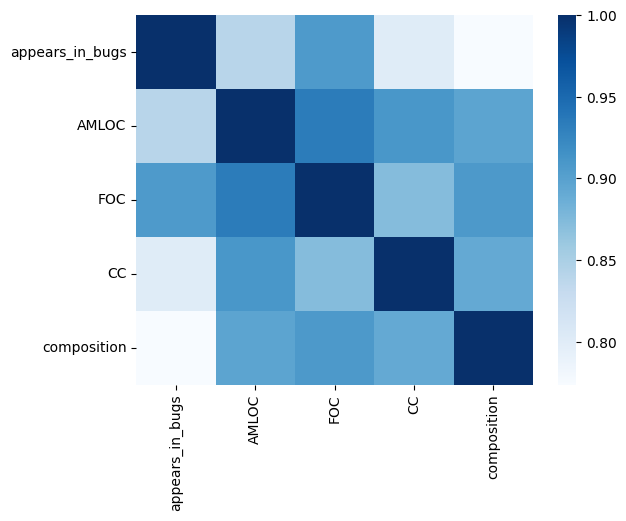

In [8]:
# calculate the correlation matrix on the numeric columns
corr = df_bugs.select_dtypes('number').corr()
sns.heatmap(corr, cmap='Blues')

In [3]:
df_merge = pd.merge(df_bugs, df_issues, how='inner', on='file')
df_merge

,file,appears_in_bugs,AMLOC_x,FOC_x,CC_x,composition_x,appears_in_issues,AMLOC_y,FOC_y,CC_y,composition_y
0,StorageService.java,160.0,3537,144,838,426816864,967.0,3537,144,838,426816864
1,ColumnFamilyStore.java,139.0,1966,89,373,65265302,832.0,1966,89,373,65265302
2,DatabaseDescriptor.java,90.0,2092,87,471,85723884,659.0,2092,87,471,85723884
3,CompactionManager.java,72.0,1279,74,265,25081190,406.0,1279,74,265,25081190
4,StorageProxy.java,71.0,1667,53,377,33308327,463.0,1667,53,377,33308327
5,Config.java,58.0,553,52,12,345072,379.0,553,52,12,345072
6,MessagingService.java,50.0,574,36,165,3409560,288.0,574,36,165,3409560
7,SSTableReader.java,47.0,767,53,324,13170924,352.0,767,53,324,13170924
8,NodeProbe.java,39.0,513,37,255,4840155,287.0,513,37,255,4840155
9,SelectStatement.java,39.0,1174,44,177,9143112,245.0,1174,44,177,9143112


In [11]:
colunas = ['file', 'appears_in_issues','appears_in_bugs', 'AMLOC_x', 'FOC_x', 'CC_x', 'composition_x']
df_merge = df_merge[colunas]
df_merge

,file,appears_in_issues,appears_in_bugs,AMLOC_x,FOC_x,CC_x,composition_x
0,StorageService.java,967.0,160.0,3537,144,838,426816864
1,ColumnFamilyStore.java,832.0,139.0,1966,89,373,65265302
2,DatabaseDescriptor.java,659.0,90.0,2092,87,471,85723884
3,CompactionManager.java,406.0,72.0,1279,74,265,25081190
4,StorageProxy.java,463.0,71.0,1667,53,377,33308327
5,Config.java,379.0,58.0,553,52,12,345072
6,MessagingService.java,288.0,50.0,574,36,165,3409560
7,SSTableReader.java,352.0,47.0,767,53,324,13170924
8,NodeProbe.java,287.0,39.0,513,37,255,4840155
9,SelectStatement.java,245.0,39.0,1174,44,177,9143112


<Axes: >

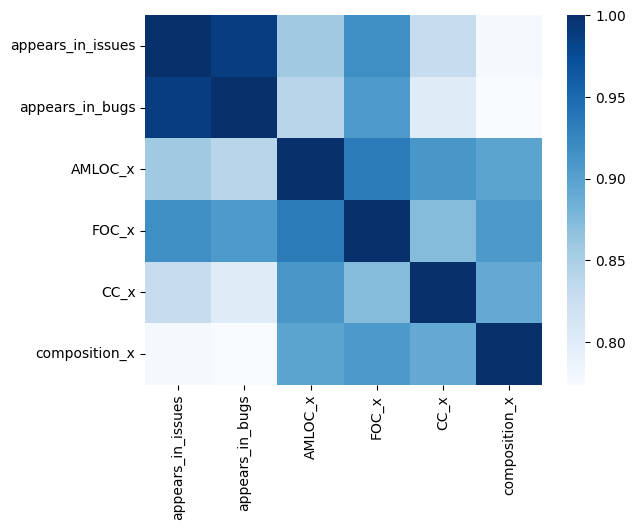

In [13]:
# calculate the correlation matrix on the numeric columns
corr = df_merge.select_dtypes('number').corr()

sns.heatmap(corr, cmap='Blues')